<a href="https://colab.research.google.com/github/ctognola/VialAccidentPredictor/blob/main/EDA_intervenciones_seguridad_vial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [2]:
# repo viejo donde guardamos el dataset
!wget https://github.com/peronvidal/tp-grupal-3-marias/raw/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx

--2023-07-31 23:27:16--  https://github.com/peronvidal/tp-grupal-3-marias/raw/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/peronvidal/tp-grupal-3-marias/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx [following]
--2023-07-31 23:27:16--  https://raw.githubusercontent.com/peronvidal/tp-grupal-3-marias/master/datasets/intervenciones-de-seguridad-vial/intervenciones-de-seguridad-clean.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 495977 (484K) [application/octet-

Como no eran tantos datos hicimos el EDA en Excel. Acá ya lo importamos limpio. Lo vamos a chusmear a ver si hay insights que pueda tener en cuenta el futuro modelo.

In [3]:
df = pd.read_excel('intervenciones-de-seguridad-clean.xlsx')
orig_df= pd.read_excel('intervenciones-de-seguridad-clean.xlsx')

In [4]:
## Acá se agregan columnas con datos relacionados a fechas
df['fecha_original'] = df['fecha']
df['fecha'] = pd.to_datetime(df['fecha']) # todas las fechas a datetime de pandas
df['year'] = pd.DatetimeIndex(df['fecha']).year
df['month'] = pd.DatetimeIndex(df['fecha']).month
df['day'] = pd.DatetimeIndex(df['fecha']).month
# Función condición para encasillar lesionados (0) o fallecidos (1)
def condition(row):
    if row['lesionados'] > 0 or row['fallecidos']>0:
        return 1
    else:
        return 0

# Agregar la función para que cree la columna binaria de heridos o fallecidos
# También agrega valores binarios sobre el tipo de vehículo involucrado
df['heridos_o_fallecidos'] = df.apply(lambda row: condition(row), axis=1)
df.loc[df['moto'] > 0, 'moto'] = 1
df.loc[df['liviano'] > 0, 'liviano'] = 1
df.loc[df['bus'] > 0, 'bus'] = 1
df.loc[df['camion'] > 0, 'camion'] = 1
# df[['fecha', 'fecha_original','month']]
df.head(10)

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion,fecha_original,year,month,day,heridos_o_fallecidos
0,2014-01-01,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0,2014-01-01,2014,1,1,1
1,2014-01-01,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0,2014-01-01,2014,1,1,0
2,2014-01-01,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,0,2014-01-01,2014,1,1,1
3,2014-03-01,7,AU CAMPORA,DESCENDENTE,600,BUENO,SECA,0,0,OBSTACULO NO FIJO,0,0,0,1,2014-03-01,2014,3,3,0
4,2014-03-01,21,AU PERTIO MORENO,DESCENDENTE,5400,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0,2014-03-01,2014,3,3,1
5,2014-04-01,9,AU 25 DE MAYO,DESCENDENTE,4700,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,0,2014-04-01,2014,4,4,0
6,2014-04-01,19,AU DELLEPIANE,ASCENDENTE,3800,BUENO,SECA,1,0,OBSTACULO NO FIJO,0,1,0,0,2014-04-01,2014,4,4,1
7,2014-05-01,15,AU DELLEPIANE,ASCENDENTE,4000,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,1,0,0,1,2014-05-01,2014,5,5,0
8,2014-06-01,7,AV LUGONES,DESCENDENTE,7000,BUENO,SECA,3,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,1,2014-06-01,2014,6,6,1
9,2014-06-01,9,AU PERTIO MORENO,TRANSICION RAMAL 2,RAMAL ENLACE,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,0,0,2014-06-01,2014,6,6,0


In [5]:
df_month_superficie = df.groupby(['month','superficie_de_la_via'])['lesionados'].sum().reset_index()
df_month_superficie = df.groupby(['month','condiciones_meteorologicas'])['lesionados'].sum().reset_index()
df_year = df.groupby(['year'])['lesionados'].sum().reset_index()
df_year_deaths = df.groupby(['year'])['fallecidos'].sum().reset_index()
df_month = df.groupby(['month'])['lesionados'].sum().reset_index()
df_year.head()

,year,lesionados
0,2014,683
1,2015,715
2,2016,679
3,2017,740
4,2018,576


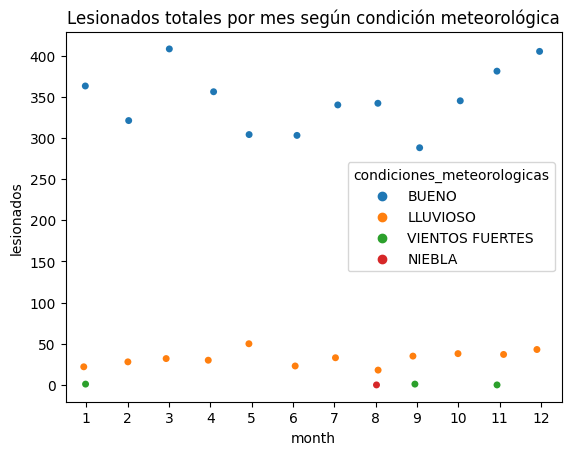

In [6]:
sns.stripplot(data=df_month_superficie, x="month", y="lesionados", hue="condiciones_meteorologicas", legend=True)
plt.title("Lesionados totales por mes según condición meteorológica")
plt.show()

No hay un patrón que nos pueda decir que el dataset está sesgado pero sí es interesante como es una cuestión de 'extremos'.Entre 50 y 250 no hay datos.

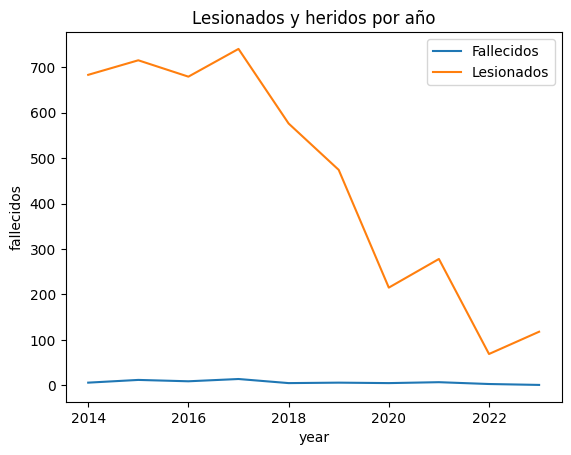

In [7]:
# Lineplot para chusmear datos
# Combino  las dos tablas
df_combined = df_year.merge(df_year_deaths, on='year', how='inner')
sns.lineplot(data=df_combined, x="year", y='fallecidos', label="Fallecidos")
sns.lineplot(data=df_combined, x="year", y='lesionados', label="Lesionados")
plt.title('Lesionados y heridos por año')
plt.show()

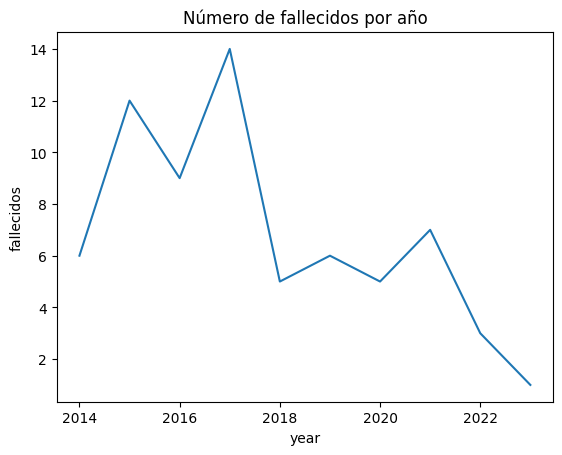

In [8]:
sns.lineplot(data=df_year_deaths,x="year",y='fallecidos')
plt.title("Número de fallecidos por año")
plt.show()
# En comparación con el número de lesionados es mucho menor, por eso en el plot anterior resembla una línea plana

In [9]:

#df['fecha'] = pd.to_datetime(df['fecha'])
# sns.plot(df_grp.month,df_grp.fallecidos)
#sns.histplot(data=df_month_superficie
             #, x="month"
             #,y='lesionados'
            #  ,legend=False
            #  ,hue='superficie_de_la_via'
             #, cumulative=True
             #,cbar=False
             #)

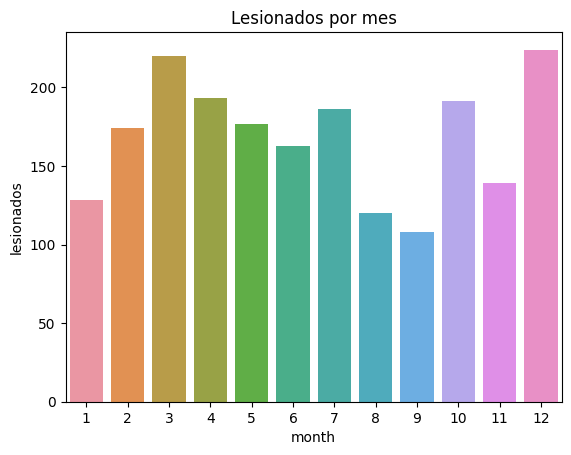

Meses con más lesionados month
12    448
3     440
Name: lesionados, dtype: int64


In [10]:
# Lesionados por mes
sns.barplot(data = df_month_superficie, x = 'month', y = 'lesionados', errorbar = None)
plt.title('Lesionados por mes')
plt.show()
lesionados_mes = df_month_superficie.groupby('month')['lesionados'].sum()
print('Meses con más lesionados', lesionados_mes.nlargest(2))

In [11]:
df_month_superficie['lesionados'].max()
df_month_superficie.groupby('month')['lesionados'].sum().reset_index()

,month,lesionados
0,1,386
1,2,349
2,3,440
3,4,386
4,5,354
5,6,326
6,7,373
7,8,360
8,9,324
9,10,383


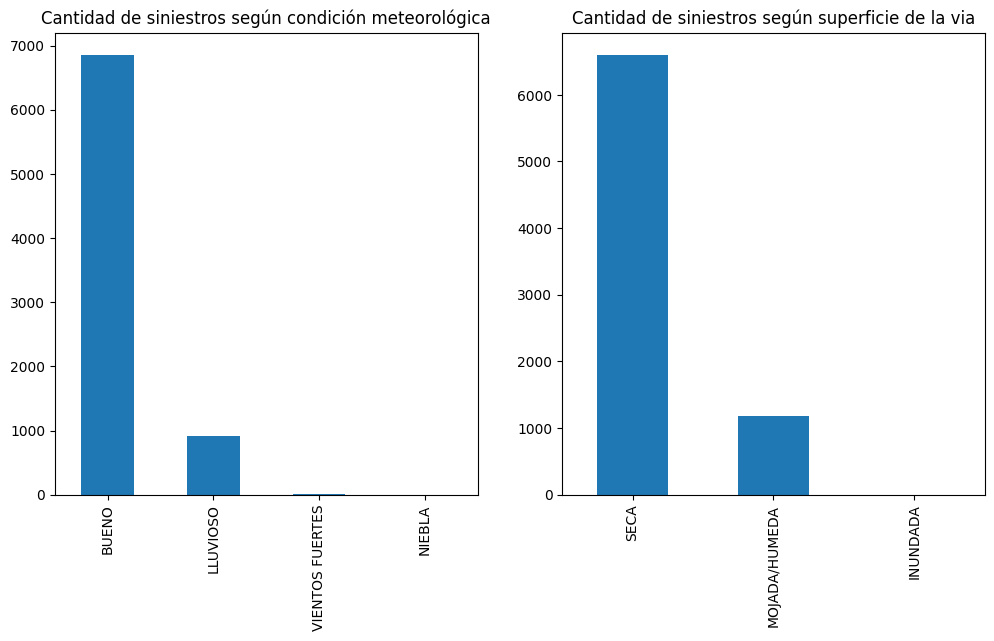

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
df['condiciones_meteorologicas'].value_counts().plot(kind='bar', ax = ax1)
ax1.set_title('Cantidad de siniestros según condición meteorológica')
df['superficie_de_la_via'].value_counts().plot(kind='bar', ax = ax2)
ax2.set_title('Cantidad de siniestros según superficie de la via')
plt.show()

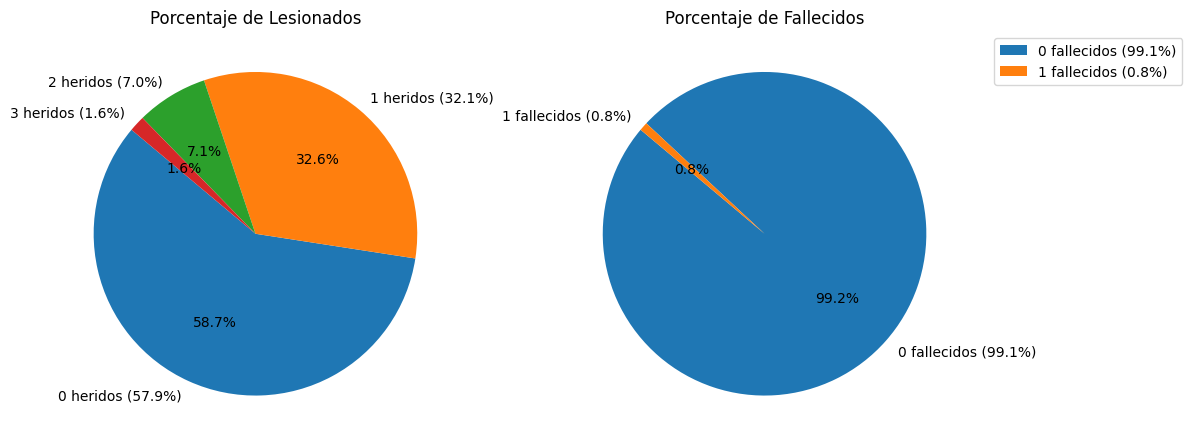

In [37]:
porcentaje_lesionados = (df['lesionados'].value_counts(normalize=True) * 100)
porcentaje_fallecidos = (df['fallecidos'].value_counts(normalize=True) * 100)

# Incluyamos solo los porcentajes mayores o iguales a 0.7
umbral = 0.7
valores_relevantes_lesionados = porcentaje_lesionados[porcentaje_lesionados >= umbral]
valores_relevantes_fallecidos = porcentaje_fallecidos[porcentaje_fallecidos >= umbral]

plt.figure(figsize=(12, 6))

# Lista de comprensión para crear etiquetas
# value es la cantidad de heridos/fallecidos y porcentage el porcentaje correspondiente
labels1 = [f"{value} heridos ({percentage:.1f}%)" for value, percentage in zip(valores_relevantes_lesionados.index, valores_relevantes_lesionados)]
labels2 = [f"{value} fallecidos ({percentage:.1f}%)" for value, percentage in zip(valores_relevantes_fallecidos.index, valores_relevantes_fallecidos)]

plt.subplot(1, 2, 1)
plt.pie(valores_relevantes_lesionados, labels=labels1, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Lesionados')

plt.subplot(1, 2, 2)
plt.pie(valores_relevantes_fallecidos, labels=labels2, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Fallecidos')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


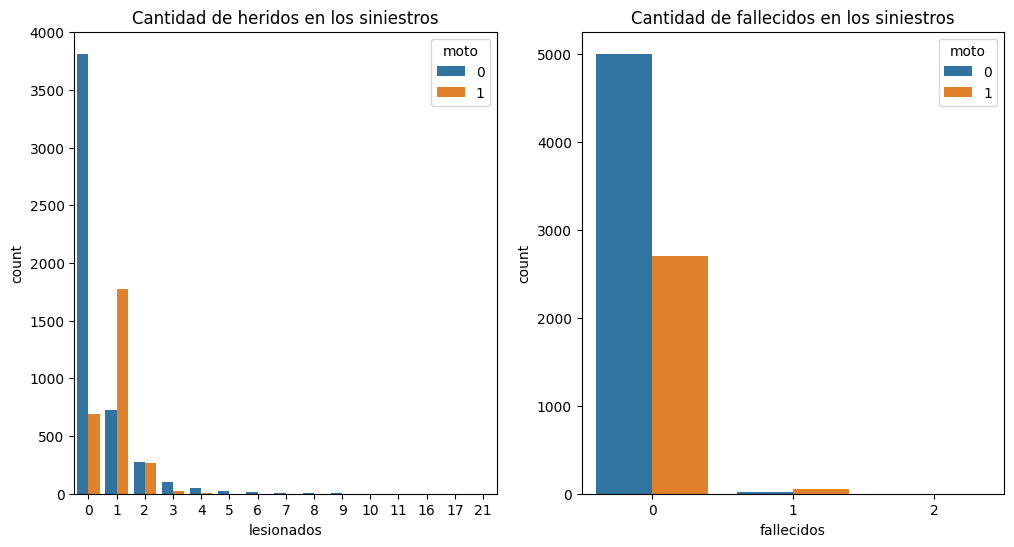

In [53]:
# Afectan la presencia de motos a la cantidad de heridos o fallecidos?
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=df, x='lesionados',hue = 'moto', ax = ax1)
ax1.set_title("Cantidad de heridos en los siniestros")
sns.countplot(data=df, x='fallecidos',hue = 'moto', ax = ax2)
ax2.set_title("Cantidad de fallecidos en los siniestros")
plt.show()
# Si hay una moto involucrada, hay muchos más siniestros de un lesionado a que si no hubiese moto
# Hay más casos de un fallecido donde hubo una moto. El modelo tendrá en cuenta esta apreciación?

Ver que hacemos con lo de abajo. Qué es ese arbol??

In [14]:
# porcentaje de intervenciones por estado de superficie
#porcentajes_superficies = df['superficie_de_la_via'].value_counts(normalize=True) * 100
#porcentajes_superficies.plot(kind='bar')

In [29]:
#sns.violinplot(x=df["lesionados"],y=df["moto"])

In [16]:
# sns.violinplot(y=df["heridos_o_fallecidos"],x=df["condiciones_meteorologicas"])

In [17]:
# porcentaje de intervenciones por estado de superficie
# porcentajes_superficies = df['heridos_o_fallecidos'].value_counts()
# porcentajes_superficies.plot(kind='bar')

In [18]:
#from sklearn.model_selection import train_test_split
#X = pd.get_dummies(data=df, columns=['condiciones_meteorologicas','autopista','superficie_de_la_via','moto','liviano','camion','bus'])
#X = pd.concat([X,df[['month','day']]],axis=1)
#y = df['heridos_o_fallecidos']
#X = X.drop(["heridos_o_fallecidos","fecha","pk","banda_y_o_ramal","lesionados","fallecidos","year","fecha","tipo_de_siniestro","hora","fecha_original"], axis=1)

# DATASET listo para usar en un modelo de clasificación
#X_train, X_test, y_train, y_test = train_test_split(
 #   X, y, test_size=0.25, random_state=42)
# bolsa de sueños: una forma mas facil de conseguir solo los dummies

In [19]:
# decision tree de las variables dummies, heridos o fallecidos
#from sklearn.tree import DecisionTreeClassifier
#target_df_dummies = pd.get_dummies(df['heridos_o_fallecidos'])
#clf_dummie = DecisionTreeClassifier()
# target_df_dummies
#clf_dummie.fit(X_train,y_train)
# target_df_dummies
#clf_dummie_pred = clf_dummie.predict(X_test)
#clf_dummie.score(X_test,y_test)
# target_df_dummies
# df['heridos_o_fallecidos']
# df['heridos_o_fallecidos']


In [20]:
# genero matriz de confusion
#sns.set(rc={'figure.figsize':(5,5)})
#y_pred_arbol = clf_dummie.predict(X)
#cf_matrix = confusion_matrix(y, y_pred_arbol)
#print(cf_matrix)
#group_names = ['True Neg','False Pos','False Neg','True Pos']
#group_counts = ['{0:0.0f}'.format(value) for value in
 #               cf_matrix.flatten()]
#group_percentages = ['{0:.2%}'.format(value) for value in
 #                    cf_matrix.flatten()/np.sum(cf_matrix)]
#labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
  #        zip(group_names,group_counts,group_percentages)]
#labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
# por que hay tantos falsos negativos??
# podriamos ajustar los hiperparametros o el modelo
#


In [21]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Create a sample DataFrame
#data = {
 #   'Category': ['A', 'A', 'B', 'B', 'B', 'C'],
  #  'Value': [10, 20, 10, 30, 40, 10]
#}
#df = pd.DataFrame(data)

# Calculate the percentage of each value grouped by 'Category'
#percentage = df.groupby(['Category', 'Value']).size() / df.groupby('Category').size() * 100

# Convert the Series to a DataFrame
#percentage_df = percentage.reset_index()
#percentage_df.columns = ['Category', 'Value', 'Percentage']

# Plot the percentages
#plt.figure(figsize=(8, 6))
#sns.barplot(x='Category', y='Percentage', hue='Value', data=percentage_df)

# Set plot labels and title
#plt.xlabel('Category')
#plt.ylabel('Percentage')
#plt.title('Percentage of Values by Category')

# Show the plot
#plt.show()






